#### 1️⃣ Google Colab 환경 설정
- GPU 활성화 (런타임 → 런타임 유형 변경 → GPU 선택)
- Google Drive 연동 (학습 데이터 및 모델 저장)
- 필요한 라이브러리 설치 (torch, transformers 등)

In [13]:
# Google Drive 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# 필수 라이브러리 설치
# 한글 폰트(Nanum) 설치 (시각화 시 한글 깨짐 방지)
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,072 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [15]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 23.8 MB/s eta 0:00:00


## 2️⃣ 베이스라인 모델

### Hugging Face의 matthewburke/korean_sentiment 모델 사용

In [16]:
# 테스트용 댓글 데이터 샘플
dic = {0:'NEGATIVE', 1:'POSITIVE'}
X_test = [
        "둘이 합치니까 신체적+정신적 교육 쌉가능이네ㅋㅋㅋㅋㅋ",
        "세라가 원시인인걸 왜 인정하냐 현아 거참 특이한 곳에서 골때리네 ㅋㅋㅋ" ,
        "폭력과 Be폭력을 동시에 경험하는 귀한 인재로군",
        "이러다 언젠간 미리보기 한화당 5개 지르라고 하겠네 ㅋㅋㅋㅋㅋㅋㅋ",
        "솔직히 쳐맞을 애들 많지",
        "어딜가나 늙고 추한것들이 있구만,,,노인공격으로 제대로 보내줬으면",
        "아으으으 이 썩겠다 달달해",
        "와 마지막 진짜 가슴 아프네 저게 어떤 돈인데..."
    ]

y_test = [1, 1, 1, 0, 0, 1, 1, 1]

In [17]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# 모델 및 토크나이저 불러오기
tokenizer = AutoTokenizer.from_pretrained("matthewburke/korean_sentiment")
model = AutoModelForSequenceClassification.from_pretrained("matthewburke/korean_sentiment", num_labels=2)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/396k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/788k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/887 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

In [18]:
# 파인 튜닝 이전 추론
# 모델을 eval 모델로 전환
model.eval()

# 모델 예측을 담을 preds라는 빈 컨테이너 리스트 생성
preds = []

with torch.no_grad():
  for article in X_test:
    inputs = tokenizer.encode(article, return_tensors="pt",padding=True, truncation=True)
    outputs = model(inputs)
    logits = outputs.logits
    pred = logits.argmax(-1).item()
    preds.append(logits.argmax(-1).item())
    print(f"{dic[pred]}:{article}")


POSITIVE:둘이 합치니까 신체적+정신적 교육 쌉가능이네ㅋㅋㅋㅋㅋ
NEGATIVE:세라가 원시인인걸 왜 인정하냐 현아 거참 특이한 곳에서 골때리네 ㅋㅋㅋ
POSITIVE:폭력과 Be폭력을 동시에 경험하는 귀한 인재로군
NEGATIVE:이러다 언젠간 미리보기 한화당 5개 지르라고 하겠네 ㅋㅋㅋㅋㅋㅋㅋ
POSITIVE:솔직히 쳐맞을 애들 많지
NEGATIVE:어딜가나 늙고 추한것들이 있구만,,,노인공격으로 제대로 보내줬으면
POSITIVE:아으으으 이 썩겠다 달달해
POSITIVE:와 마지막 진짜 가슴 아프네 저게 어떤 돈인데...


In [19]:
from sklearn.metrics import accuracy_score, classification_report

before_accuracy = accuracy_score(y_test, preds)
before_report = classification_report(y_test, preds, target_names=["NEGATIVE", "POSITIVE"])

print(f"모델 정확도(Accuracy): {before_accuracy:.2f}")
print("\n상세 평가 지표")
print(before_report)

모델 정확도(Accuracy): 0.62

상세 평가 지표
              precision    recall  f1-score   support

    NEGATIVE       0.33      0.50      0.40         2
    POSITIVE       0.80      0.67      0.73         6

    accuracy                           0.62         8
   macro avg       0.57      0.58      0.56         8
weighted avg       0.68      0.62      0.65         8



## 3️⃣ 파인 튜닝에 쓸 데이터 준비 (영화 리뷰 데이터 활용)
- 네이버 영화 리뷰(NSMC) 데이터셋 전처리

In [20]:
import pandas as pd

# NSMC 네이버 영화 리뷰 감성 데이터 로드 (GitHub에서 직접 불러오기)
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t").dropna()
df = df[['document', 'label']]  # 텍스트와 감성 라벨 (1=긍정, 0=부정)

In [21]:
# 데이터 확인
print(df.head())

                                            document  label
0                                아 더빙.. 진짜 짜증나네요 목소리      0
1                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2                                  너무재밓었다그래서보는것을추천한다      0
3                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1


In [22]:
# 기본 전처리
import re

# 한글, 숫자, 영어만 남기고 특수문자 제거하는 함수
def clean_text(text):
    text = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣0-9a-zA-Z ]", "", str(text))
    return text.strip()

# 텍스트 전처리 적용
df['document'] = df['document'].apply(clean_text)

# 데이터 확인
print(df.head())


                                            document  label
0                                  아 더빙 진짜 짜증나네요 목소리      0
1                         흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나      1
2                                  너무재밓었다그래서보는것을추천한다      0
3                          교도소 이야기구먼 솔직히 재미는 없다평점 조정      0
4  사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...      1


## 4️⃣ 파인 튜닝

In [23]:
df.document.values.tolist() # document를 리스트로

['아 더빙 진짜 짜증나네요 목소리',
 '흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 솔직히 재미는 없다평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화ㅋㅋㅋ별반개도 아까움',
 '원작의 긴장감을 제대로 살려내지못했다',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지정말 발로해도 그것보단 낫겟다 납치감금만반복반복이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나',
 '걍인피니트가짱이다진짜짱이다',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극허진호는 감성절제멜로의 달인이다',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다 신문기사로만 보다 보면 자꾸 잊어버린다 그들도 사람이었다는 것을',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드',
 '약탈자를 위한 변명 이라 저놈들은 착한놈들 절대 아닌걸요',
 '나름 심오한 뜻도 있는 듯 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남바베트의 만찬은 이야기도 있고 음식 보는재미도 있는데  이건 볼게없다 음식도 별로 안나오고 핀란드 풍경이라도 구경할랫

In [24]:
# 전체 데이터가 아닌 일부만 사용해도 성능을 충분히 끌어올릴 수 있기 때문에 시간과 자원을 절약 가능
X_train = df.document.tolist()[:100]
y_train = df.label.tolist()[:100]

In [25]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        return text, label

# Dataset 생성
dataset = TextDataset(X_train, y_train)

# DataLoader 생성 (batch_size=16)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, drop_last=True)

In [26]:
for x, y in dataloader:
  print(x, y)

('ㅋㅋㅋ 진짜 골깜ㅋㅋ 눈 부라릴때 쓰러짐ㅋㅋ', '매우 실망', '불알이 나와서 당황아무튼 영화가 중간에 끝나는 느낌', '볼때마다 눈물나서 죽겠다90년대의 향수자극허진호는 감성절제멜로의 달인이다', '재미있어요', '이 영화가 왜 이렇게 저평가 받는지 모르겠다', '어설픈 전개 어이없는 결말', '정말 맘에 들어요 그래서 또 보고싶은데 또 보는 방법이 없네  ㅜㅡ', '아직도 이 드라마는 내인생의 최고', '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드', 'kl2g 고추를 털어버려야 할텐데', '영화가 사람의 영혼을 어루만져 줄 수도 있군요 거친 세상사를 잠시 잊고 동화같은 영화에 행복했네요', '너무재밓었다그래서보는것을추천한다', '사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다', '김남길의 백점짜리 연기력과 초반 몰입도에도 불구하고 지루하고 손예진 ㅈㅈ', '클라라볼라고화신본거아닌데', '골때리네ㅋㅋㅋㅋ 걸스데이 이혜리 잘 되라', '이건 뭐냐 우뢰매냐', '평점에속지마시길시간낭비 돈낭비임', '평범함속에 녹아든 평범한 일상 조금 밋밋한게 흠', '설정이 재밌고 새로운 에피소드 내에서 메인 스토리도 차차 나오는게 재밌음', '왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나', '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지', '최고', '흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나', '포스터는 있어보이는데 관객은 114명이네', '보던거라 계속보고있는데 전개도 느리고 주인공인 은희는 한두컷 나오면서 소극적인모습에 짜증이 ㅜㅜ 맨날 언제끝나나 기대만하고있어요 전개좀 빨리빨리 ㅜㅜ', '난 우리영화를 사랑합니다', '많은 사람들이 이 다큐를 보고 우리나라 슬픈 현대사의 한 단면에 대해 깊이 생각하고 사죄하고 바로 잡기 위해 노력했으면 합니다 말로만 듣던 보도연맹 그 민간인

In [27]:
tokenizer # 토크나이저로 형태소 분리

BertTokenizerFast(name_or_path='matthewburke/korean_sentiment', vocab_size=50135, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [28]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

# 모델을 학습 모드로 변경
model.train()

# 에포크 수 지정 및 손실을 담은 빈 컨테이너 리스트 생성
epochs = 30
losses = []

for epoch in range(epochs):

    epoch_loss = 0.0
    batch_count = 0

    for X_batch, y_batch in dataloader:
        # 그래디언트(기울기) 초기화
        optimizer.zero_grad()

        # 문장을 토크나이징하고 인코딩
        inputs = tokenizer.batch_encode_plus(X_batch, return_tensors="pt", padding=True, truncation=True)
        # print(inputs)
        # 모델에 데이터 전달
        outputs = model(**inputs, labels=y_batch)
        # print(outputs)
        # 로짓 추출
        logits = outputs.logits

        # 손실 추출
        loss = outputs.loss
        # 오차역전파
        loss.backward()

        # 가중치(weight) 업데이트
        optimizer.step()

        # 손실을 빈 컨테이너 losses에 순서대로 저장
        epoch_loss += loss.item()
        batch_count += 1

    avg_loss = epoch_loss / batch_count
    # 에포크 및 손실 값 출력
    print(f"epoch:{epoch+1}, loss:{avg_loss}")

    losses.append(avg_loss)


epoch:1, loss:0.3254850109418233
epoch:2, loss:0.2573951929807663
epoch:3, loss:0.20428721606731415
epoch:4, loss:0.17742662380139032
epoch:5, loss:0.1844920963048935
epoch:6, loss:0.1359816094239553
epoch:7, loss:0.1273855740825335
epoch:8, loss:0.11249338090419769
epoch:9, loss:0.08993033443888028
epoch:10, loss:0.08212289089957873
epoch:11, loss:0.05062683920065562
epoch:12, loss:0.05251039192080498
epoch:13, loss:0.04186891267697016
epoch:14, loss:0.03901449218392372
epoch:15, loss:0.04436864207188288
epoch:16, loss:0.032923089961210884
epoch:17, loss:0.031719197829564415
epoch:18, loss:0.03280319459736347
epoch:19, loss:0.02933478665848573
epoch:20, loss:0.02184067356089751
epoch:21, loss:0.02260245072344939
epoch:22, loss:0.021429204071561497
epoch:23, loss:0.02123364433646202
epoch:24, loss:0.019020579134424526
epoch:25, loss:0.017047688985864323
epoch:26, loss:0.01666194386780262
epoch:27, loss:0.016150205085674923
epoch:28, loss:0.022540070737401646
epoch:29, loss:0.0148326810

In [29]:
new_losses = [i for i in losses]

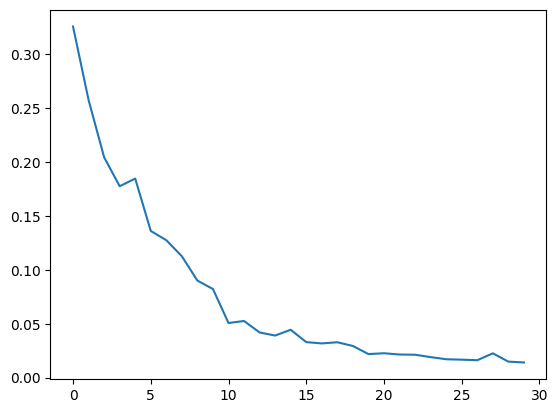

In [30]:
import matplotlib.pyplot as plt
plt.plot(new_losses);

In [31]:
# 파인 튜닝 이후 추론
# 모델을 eval 모델로 전환
model.eval()

# 모델 예측을 담을 preds라는 빈 컨테이너 리스트 생성
after_preds = []

# 이하 코드의 설명은 문제 45 코드 참조
with torch.no_grad():
  for article in X_test:
    inputs = tokenizer.encode(article, return_tensors="pt",padding=True, truncation=True)
    outputs = model(inputs)
    logits = outputs.logits
    pred = logits.argmax(-1).item()
    after_preds.append(logits.argmax(-1).item())
    print(f"{dic[pred]}:{article}")


POSITIVE:둘이 합치니까 신체적+정신적 교육 쌉가능이네ㅋㅋㅋㅋㅋ
POSITIVE:세라가 원시인인걸 왜 인정하냐 현아 거참 특이한 곳에서 골때리네 ㅋㅋㅋ
POSITIVE:폭력과 Be폭력을 동시에 경험하는 귀한 인재로군
NEGATIVE:이러다 언젠간 미리보기 한화당 5개 지르라고 하겠네 ㅋㅋㅋㅋㅋㅋㅋ
POSITIVE:솔직히 쳐맞을 애들 많지
POSITIVE:어딜가나 늙고 추한것들이 있구만,,,노인공격으로 제대로 보내줬으면
POSITIVE:아으으으 이 썩겠다 달달해
POSITIVE:와 마지막 진짜 가슴 아프네 저게 어떤 돈인데...


In [32]:
# 파인 튜닝 후 모델 정확도 평가
after_accuracy = accuracy_score(y_test, after_preds)
after_report = classification_report(y_test, after_preds, target_names=["NEGATIVE", "POSITIVE"])

print(f"모델 정확도(Accuracy): {after_accuracy:.2f}")
print("\n상세 평가 지표")
print(after_report)

모델 정확도(Accuracy): 0.88

상세 평가 지표
              precision    recall  f1-score   support

    NEGATIVE       1.00      0.50      0.67         2
    POSITIVE       0.86      1.00      0.92         6

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



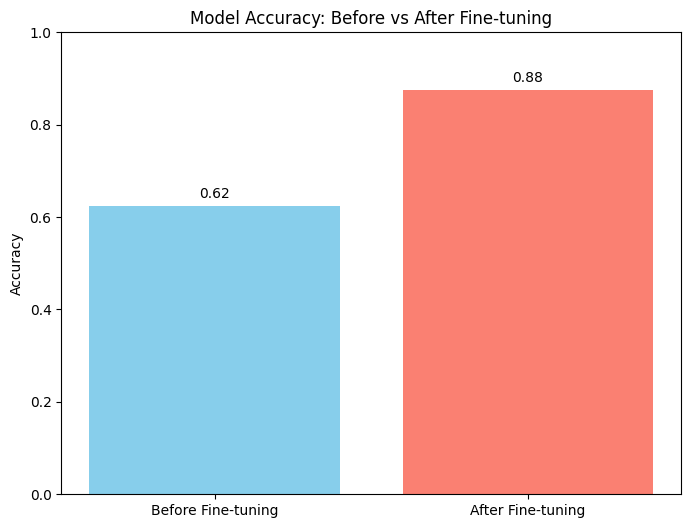

In [33]:
import matplotlib.pyplot as plt

# 정확도 값과 레이블 리스트 생성
accuracies = [before_accuracy, after_accuracy]
labels = ['Before Fine-tuning', 'After Fine-tuning']

# 그래프 설정 및 출력
plt.figure(figsize=(8,6))
bars = plt.bar(labels, accuracies, color=['skyblue', 'salmon'])
plt.ylim(0, 1)  # 정확도는 0~1 사이의 값
plt.ylabel('Accuracy')
plt.title('Model Accuracy: Before vs After Fine-tuning')

# 각 막대 위에 정확도 값 표시
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{acc:.2f}',
             ha='center', va='bottom')

plt.show()

In [35]:
##### 모델 저장 경로 설정
model_save_path = "/content/drive/MyDrive/fisatoon/toon_sentiment_model"

tokenizer.save_pretrained(model_save_path)
model.save_pretrained(model_save_path)

In [36]:
import json
import pandas as pd
from transformers import pipeline

# 1. JSON 파일 읽기
json_file_path = "/content/drive/MyDrive/fisatoon/comments.json"  # JSON 파일 경로 (필요에 따라 수정)
with open(json_file_path, "r", encoding="utf-8") as f:
    records = json.load(f)
print("전체 회차 개수:", len(records))

# 2. 파인튜닝된 감성 분석 파이프라인 생성
model_path = "/content/drive/MyDrive/fisatoon/toon_sentiment_model"  # 저장된 파인튜닝 모델 경로
finetuned_classifier = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

# 3. 결과를 저장할 리스트 초기화
rows = []

# 4. 각 회차별로 댓글 처리
# (각 record에는 webtoon_id, episode, rating, comments 배열이 있음)
# sentiment 결과에서 label은 "LABEL_0"/"LABEL_1" 또는 "NEGATIVE"/"POSITIVE"로 나올 수 있으므로 변환 매핑 설정
label_map = {"LABEL_0": 0, "LABEL_1": 1, "NEGATIVE": 0, "POSITIVE": 1}

for rec in records:
    webtoon_id = rec.get("webtoon_id", "")        # 웹툰 ID
    episode = rec.get("episode", "")              # 화번호
    rating = rec.get("rating", None)              # 실제별점
    comments = rec.get("comments", [])

    # 댓글 텍스트 리스트 추출
    texts = [comment.get("text", "") for comment in comments if "text" in comment]
    if len(texts) == 0:
        continue  # 댓글이 없으면 넘어감

    # 5. 감성 분석 수행 (batch 처리)
    results = finetuned_classifier(texts)

    # 6. 각 댓글에 대해 긍정/부정 값 계산
    pos_values = []
    neg_values = []
    for result in results:
        # result["label"]를 숫자로 변환
        numeric_label = label_map.get(result["label"], None)
        score = result.get("score", 0)
        if numeric_label is None:
            continue
        if numeric_label == 1:
            pos = score         # 긍정일 때 긍정값은 score
            neg = 1 - score     # 부정값은 1-score
        else:
            neg = score         # 부정일 때 부정값은 score
            pos = 1 - score     # 긍정값은 1-score
        pos_values.append(pos)
        neg_values.append(neg)

    # 7. 회차별 평균 긍정비율 및 부정비율 계산 (댓글별 값을 평균)
    if len(pos_values) > 0 and len(neg_values) > 0:
        avg_pos = sum(pos_values) / len(pos_values)
        avg_neg = sum(neg_values) / len(neg_values)
    else:
        avg_pos = avg_neg = None

    # 8. 최종 행 데이터 생성 및 추가
    row = {
        "웹툰": webtoon_id,
        "화번호": episode,
        "긍정비율": avg_pos,
        "부정비율": avg_neg,
        "실제별점": rating
    }
    rows.append(row)

# 9. DataFrame 생성 및 CSV 파일로 저장
comment_df = pd.DataFrame(rows)
csv_filename = "/content/drive/MyDrive/fisatoon/toon_sentiment_model/finetuned_sentiment_results.csv"
comment_df.to_csv(csv_filename, index=False, encoding="utf-8-sig")
print(f"감성 분석 결과 '{csv_filename}'로 저장완료")

Device set to use cuda:0


전체 회차 개수: 6690
감성 분석 결과 '/content/drive/MyDrive/fisatoon/toon_sentiment_model/finetuned_sentiment_results.csv'로 저장완료


In [37]:
# 각 행에 누락이 없는지 확인
len(comment_df)

6690

In [38]:
print(comment_df.isnull().sum())

웹툰      0
화번호     0
긍정비율    0
부정비율    0
실제별점    0
dtype: int64


In [42]:
comment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6690 entries, 0 to 6689
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   웹툰      6690 non-null   object 
 1   화번호     6690 non-null   object 
 2   긍정비율    6690 non-null   float64
 3   부정비율    6690 non-null   float64
 4   실제별점    6690 non-null   float64
dtypes: float64(3), object(2)
memory usage: 261.5+ KB
